In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

## **1. Un operador debe levantar el check de un proceso productivo todos los dias hasta las 6 am. El check consiste en responder 75 preguntas de etapas del proceso con respuesta operativo/no operativo. Debido a que tomo el turno de la noche, el operario se quedó dormido y completo el check en los 5 minutos anteriores a las 6 am respondiendo las 75 preguntas de forma aleatoria. Encontrar la distribucion de probabilidad para el conteo de etapas operativas posibles. Encontrar la media de las etapas del proceso que en realidad estan operativas. Asumiendo que se requiere al menos 45 etapas operativas para que el proceso continue, encontrar la probabilidad de no fallo del mismo.**

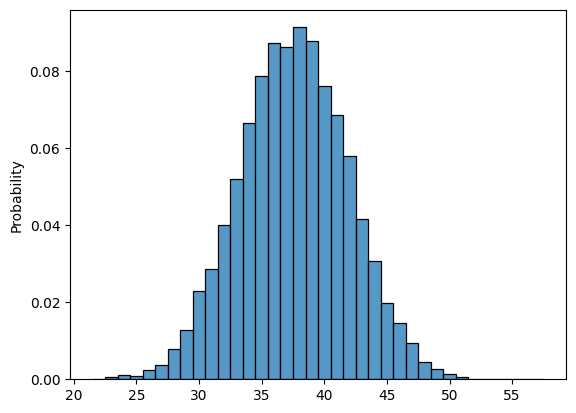

In [6]:
n_events = 75
probability = 0.5
numbers = binom.rvs(n_events, probability, size = 10000, random_state = 42)
sns.histplot(x = numbers, discrete = True, stat = 'probability')
plt.show()

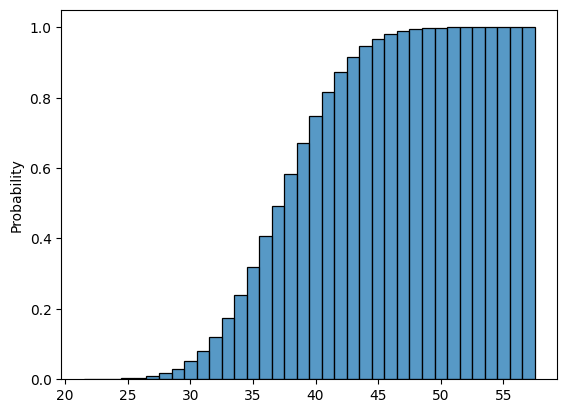

In [7]:
sns.histplot(x = numbers, discrete = True, stat = 'probability', cumulative = True)
plt.show()

95% es la probabilidad de fallo

In [8]:
1- binom.cdf(k = 44, n = n_events, p = probability)

0.052671134437302425

## **2. El 20% de los estudiantes se retira antes de completar el curso. Suponga que 30 alumnos se registraron en el curso. Calcule la probabilidad de que 2 o más se retiren. Estime la cantidad de retiros.**

In [22]:
n = 30
probability = 0.20

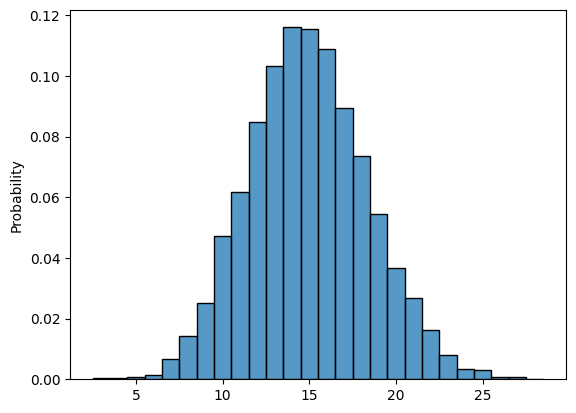

In [19]:
numbers = binom.rvs(n_events, probability, size = 10000, random_state = 42)
sns.histplot(x = numbers, discrete = True, stat = 'probability')
plt.show()

In [23]:
binom.mean(n, probability)

6.0

## **3. El año anterior, tu empresa paso de tener 1M de clientes a tener 0.977M de clientes. Asumiendo que la perdida de clientes sigue una distribucion de Poisson, calcular la probabilidad de que el proximo año, en un dia dado, tu empresa pierda 50 clientes. Cual es la probabilidad de perder 50 clientes o menos**

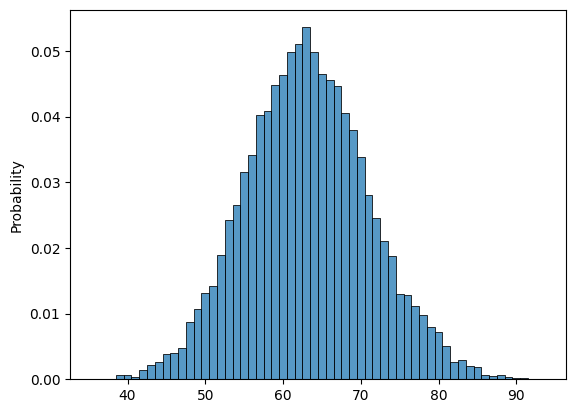

In [29]:
lambda_param = (1e6 - 0.977e6) / 365
numbers = poisson.rvs(mu = lambda_param, size = 10000, random_state = 42)
sns.histplot(x = numbers, discrete = True, stat = 'probability')
plt.show()

In [30]:
poisson.pmf(k = 50, mu = lambda_param)

0.013248664614102634

In [31]:
poisson.cdf(k = 50, mu = lambda_param)

0.05352097238201065

## **4. Calcular la probabilidad de que entren 5 llamadas telefonicas en los próximos 3 min, dado a que cada minuto entran 1,5 llamadas. Calcule la probabilidad de que no entren llamadas en lo proximos 3 min. Calcule la probabilidad de que en los proximos tres minutos entren más de dos llamadas. Calcular la probabilidad de que entren 100 o más llamadas en una hora, sabiendo que los primeros 15 minutos entraron 28 llamadas.**

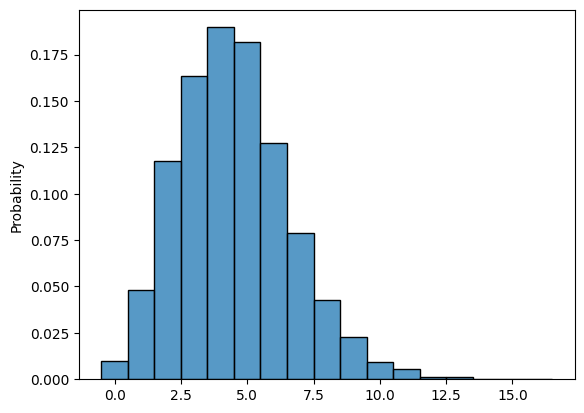

In [44]:
# probabilidad de que entren 5 llamadas en los proximos 5 minutos
lambda_param = 1.5 * 3 # se multiplica por 3 porque son 3 periodos de 5 minutos
k = 5
numbers = poisson.rvs(mu = lambda_param, size = 10000, random_state = 42)
sns.histplot(x = numbers, discrete = True, stat = 'probability')
plt.show()

In [45]:
poisson.pmf(k = k, mu = lambda_param)

0.17082685848611215

In [46]:
# probabilidad de no llamadas en los proximos 3 minutos
poisson.pmf(k = 0, mu = lambda_param)


0.011108996538242306

In [47]:
# probabilidad de que entren 3 o mas llamadas en los proximos 3 minutos
1 - poisson.cdf(k = 2, mu = lambda_param)


0.8264219290899639

<Axes: ylabel='Probability'>

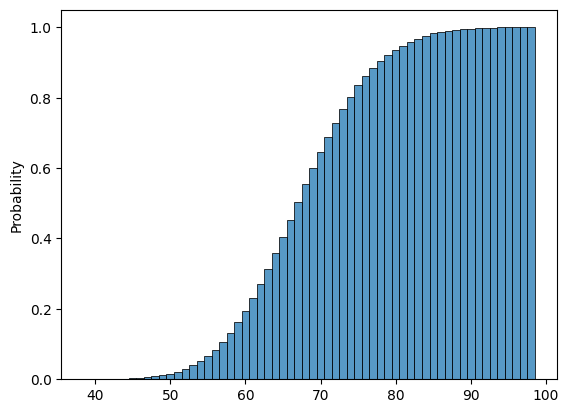

In [53]:
# probabilidad de que entren 100 o más llamadas en una hora, sabiendo que los primeros 15 minutos entraron 28 llamadas
lambda_param = 1.5 * 45
numbers = poisson.rvs(mu = lambda_param, size = 10000, random_state = 42)
sns.histplot(x = numbers, discrete = True, stat = 'probability', cumulative = True)


In [54]:
1 - poisson.cdf(k=71, mu= lambda_param)


0.30773012020386536